In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import emcee

In [2]:
data = np.loadtxt('/home/brianbg/Documents/ML2023/olympic100m_men.txt', delimiter=',').T

In [17]:
def model(x, w0, w1, sigma):
    return w0 + w1*x + np.random.normal(0, sigma, size=len(x))


def log_likelihood(theta, x, y):
    w0, w1, sigma = theta
    y_model = model(x, w0, w1, sigma)
    return -0.5*np.sum((y-y_model)**2/sigma**2)


In [18]:
def log_prior(theta):
    w0, w1, sigma = theta
    if -10.0 < w0 < 10.0 and -10.0 < w1 < 10.0 and sigma > 0:
        return 0.0
    return -np.inf

In [19]:
def log_probability(theta, x, y):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y)


In [20]:
ndim, nwalkers = 3, 100
pos = [1 + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(data[0], data[1]))
sampler.run_mcmc(pos, 5000, progress=True)

100%|██████████| 5000/5000 [00:34<00:00, 142.94it/s]


State([[-3.92101170e-02 -3.40560676e+00  1.62951549e+17]
 [ 2.67686933e+00  5.92971265e+00  7.89787692e+16]
 [-9.67404069e+00 -5.38437242e-01  1.27352382e+17]
 [ 5.07571908e+00 -7.93220522e+00  1.21943794e+17]
 [-9.79809223e+00 -3.12334496e+00  2.05533418e+18]
 [ 1.90022390e+00  8.78930978e+00  2.75408008e+16]
 [-6.33701392e+00  1.64071677e+00  9.83938374e+16]
 [ 3.74180827e-01  9.14406453e+00  1.41180125e+17]
 [-4.34750615e+00  8.02382214e+00  1.16229368e+17]
 [-8.78347581e-01  8.84553902e+00  4.61408341e+17]
 [ 3.86057072e-01  1.90240458e-01  7.04068392e+16]
 [ 8.74412153e+00  3.22703113e+00  3.56042122e+17]
 [-4.77651417e+00  8.83364493e+00  6.88824046e+17]
 [ 9.34510103e+00 -2.74561472e+00  5.84969716e+15]
 [-7.19089013e+00  2.44500469e+00  2.28934183e+11]
 [ 9.35687532e-01  1.01322948e+00  6.32453348e+14]
 [ 5.94740841e-01 -4.46771847e+00  4.96891018e+16]
 [ 5.54921490e+00 -6.39082633e-01  1.94335846e+17]
 [ 5.07565490e+00 -9.85771742e+00  6.92740746e+16]
 [ 5.92148994e+00 -9.3137

Text(0.5, 0, 'step number')

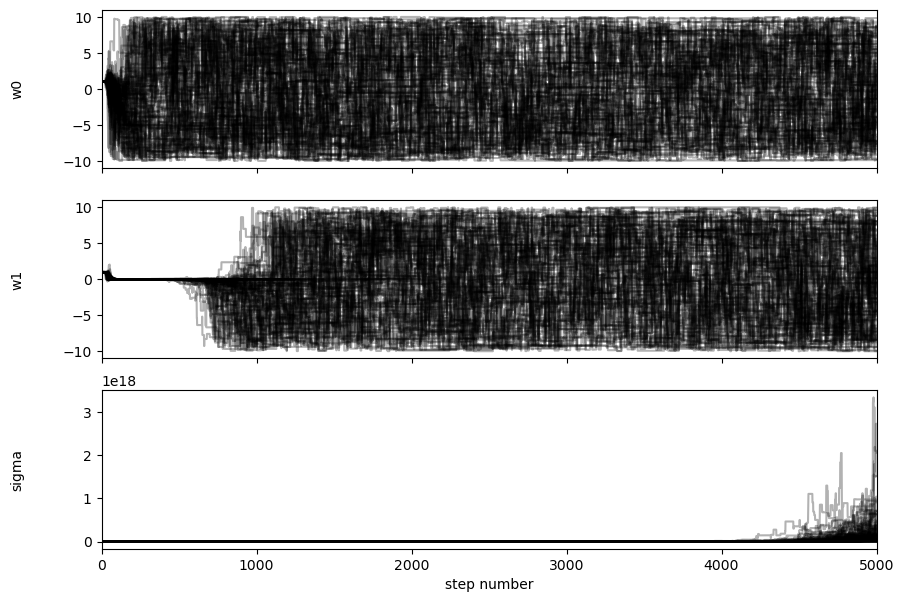

In [21]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["w0", "w1", "sigma"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")


/tmp/ipykernel_704/916397345.py:2: RuntimeWarning: invalid value encountered in sqrt
  R = np.sqrt(np.var(samples, ddof=1) / np.mean(samples, axis=0))


Gelman-Rubin criterion: [[4.10033011e+16 1.68061659e+16 3.69716243e+08]
 [1.88478028e+16 2.27756188e+16 4.57921958e+08]
 [           nan            nan 4.71991114e+08]
 [6.53549953e+16            nan 3.64619658e+08]
 [2.63691750e+16            nan 2.47467421e+08]
 [           nan            nan 6.08302198e+08]
 [           nan 3.16707585e+16 3.75141702e+08]
 [4.01307179e+16            nan 2.13065633e+08]
 [2.47898303e+16 2.25625892e+16 7.85903710e+08]
 [           nan 2.98999863e+16 3.92427350e+08]
 [1.59265230e+17 3.35851600e+16 6.55873683e+08]
 [4.33060277e+16            nan 3.91646722e+08]
 [           nan            nan 3.36198572e+08]
 [4.42730470e+16 3.19524925e+16 7.85919966e+08]
 [           nan 2.82712999e+16 1.20321556e+11]
 [2.94685072e+16            nan 4.42474174e+09]
 [           nan 3.22339222e+16 5.98926437e+08]
 [           nan 5.63885174e+16 5.72377351e+08]
 [           nan 3.30680578e+16 4.15806089e+08]
 [           nan            nan 1.17005285e+09]
 [           nan

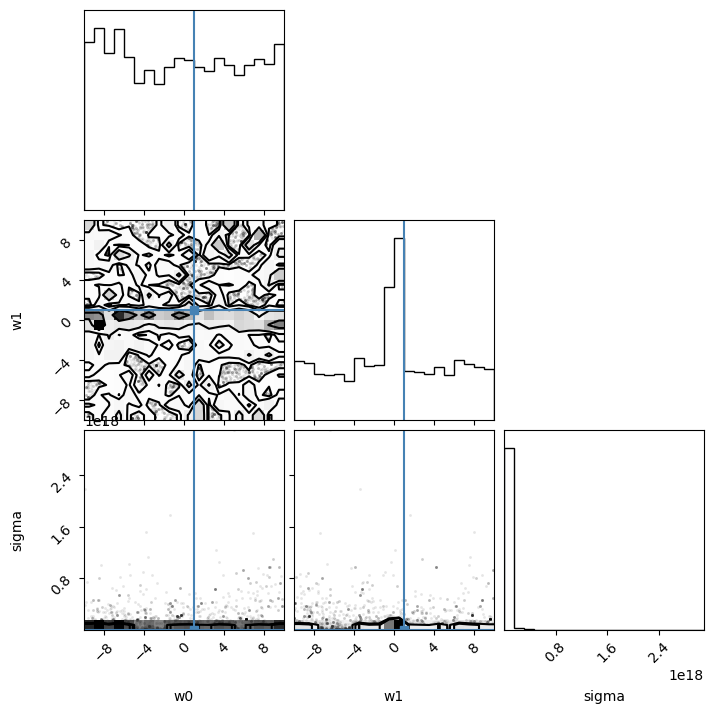

In [22]:
# Compute the Gelman-Rubin criterion
R = np.sqrt(np.var(samples, ddof=1) / np.mean(samples, axis=0))
print("Gelman-Rubin criterion:", R)

# Plot the triangle plot
import corner
samples = sampler.get_chain(discard=100, thin=15, flat=True)
fig = corner.corner(samples, labels=labels, truths=[1, 1, 1])